Exercise:

**76<=Rollnumber<=100:**

#Ex 1: Try the algo on Dataset2 - OneHotEncoding of features:and Train test Division 75%-25%

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LAB 3/Dataset2.csv')
print("Number of examples and feature:", dataset.shape)
dataset

Number of examples and feature: (14, 5)


,Outlook,Temp,Wind,Humidity,Class
0,R,H,F,Normal,N
1,R,H,T,High,N
2,O,H,F,Normal,Y
3,S,M,F,Normal,N
4,S,M,F,Normal,Y
5,S,M,T,Low,Y
6,O,C,T,Normal,Y
7,R,C,F,Normal,Y
8,R,C,F,Low,Y
9,S,M,F,High,Y


In [ ]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temp'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Class values " + "\033[91m (Class Label): " + end, dataset['Class'].unique())

Unique Outlook values:  ['R' 'O' 'S']

Unique Temperature values:  ['H' 'M' 'C']

Unique Humidity values:  ['Normal' 'High' 'Low']

Unique Wind values:  ['F' 'T']

Unique Class values  (Class Label):  ['N' 'Y']


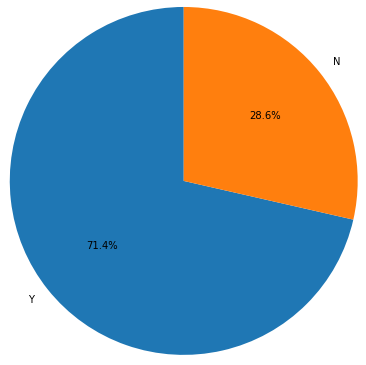

In [ ]:
pie_chart = dataset['Class'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [ ]:

dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Class")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [ ]:
print("\n\nFinal dataset :\n")
dataset.head()



Final dataset :



,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Wind_F,Wind_T,Humidity_High,Humidity_Low,Humidity_Normal,Class
0,0,1,0,0,1,0,1,0,0,0,1,N
1,0,1,0,0,1,0,0,1,1,0,0,N
2,1,0,0,0,1,0,1,0,0,0,1,Y
3,0,0,1,0,0,1,1,0,0,0,1,N
4,0,0,1,0,0,1,1,0,0,0,1,Y


In [ ]:
print("\nLabel\n\n")
All_labels = dataset['Class']
All_labels



Label




0     N
1     N
2     Y
3     N
4     Y
5     Y
6     Y
7     Y
8     Y
9     Y
10    Y
11    Y
12    Y
13    N
Name: Class, dtype: object

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],All_labels, test_size = 0.25, random_state = 82)
# Roll no 82


In [ ]:
# creating intsance
gnb = GaussianNB()

# fitting the model or training
gnb.fit(data_train,target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# testing
target_predict = gnb.predict(data_test)

In [ ]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

Accuracy: 0.75


In [ ]:

# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[0, 0],
       [1, 3]])

In [ ]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

Precision:



array([0., 1.])

In [ ]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

Recall:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.  , 0.75])

#2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 80%-20%

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # not used as data is already numerical
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn import metrics

In [ ]:
wine = datasets.load_wine()
print("Number of examples and feature:", wine.data.shape)
dataset = pd.DataFrame(wine.data)

Number of examples and feature: (178, 13)


In [ ]:
print("Features: ", wine.data)
print("Labels: ", np.unique(wine.target))


Features:  [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Labels:  [0 1 2]


In [ ]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(wine.data,
                        wine.target, test_size = 0.20, random_state = 82) 
#82 roll number

In [ ]:
#Create a Classifier
model=MultinomialNB()
# Train the model using the training sets
model.fit(data_train,target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:

target_pred = model.predict(data_test)

In [ ]:
print("Accuracy:",accuracy_score(target_test, target_pred))

Accuracy: 0.8888888888888888


In [ ]:
confusion_matrix(target_test, target_pred)

array([[11,  1,  1],
       [ 0, 16,  1],
       [ 0,  1,  5]])

Confusion matrix:
[[11  1  1]
 [ 0 16  1]
 [ 0  1  5]]


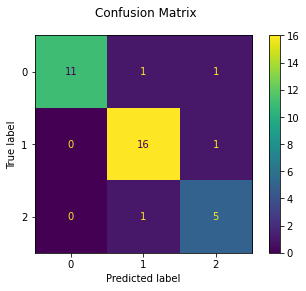

In [ ]:
disp = metrics.plot_confusion_matrix(model, data_test, target_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()